In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r"../projects/BlinkIT Grocery Data.xlsx")
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [3]:
df.shape

(8523, 12)

- **The dataset contains 8,523 rows and 12 columns.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- **df.info() shows the data type and non-null count of each column.**

## Data cleaning
**Missing Values**

In [5]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

- **df.isnull().sum()** displays the number of missing values in each column.
- Only Item Weight had missing values (1,463)
- Instead of dropping rows, missing values were filled using median of each Item Type

In [6]:
df['Item Weight'] = df.groupby('Item Type')['Item Weight'].transform(lambda x: x.fillna(x.median()))


In [7]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,12.15,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,13.15,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,11.80,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,13.35,97.8752,4.0


In [8]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

**Now there are no missing values in the dataset.**

## observation
- Right now there is no null values are there in dataset called df
- In ``Item Weight``,It has null values instead of removing the rows based on column name by using dropna() function i used to calucate the median value based on the ``item type`` to do group-wise calucate.to replace the nan values based on the item type by using **groupby() ,transfrom(),lambda and fillna()**

### To find duplicate data in dataset


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df[df.duplicated()]

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating


- **No duplicate rows are present in the dataset.**

In [12]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [13]:
df.nunique()

Item Fat Content                5
Item Identifier              1559
Item Type                      16
Outlet Establishment Year       9
Outlet Identifier              10
Outlet Location Type            3
Outlet Size                     3
Outlet Type                     4
Item Visibility              7880
Item Weight                   416
Sales                        5938
Rating                         39
dtype: int64

- **nunique() returns the number of unique values in each column.**

In [52]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [57]:
df["Item Fat Content"].replace("low fat","Low Fat",inplace=True)
df["Item Fat Content"].replace("LF","Low Fat",inplace=True)
df["Item Fat Content"].replace("reg","Regular",inplace=True)

In [58]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [14]:
df["Item Weight"].nunique() #in this case,in item weight have the 415 nunique values 

416

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
df.describe(include="all") #for all the columns 


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
count,8523,8523,8523,8523.000000,8523,8523,8523,8523,8523.000000,8523.000000,8523.000000,8523.000000
unique,5,1559,16,NaN,10,3,3,4,NaN,NaN,NaN,NaN
top,Low Fat,FDW13,Fruits and Vegetables,NaN,OUT027,Tier 3,Medium,Supermarket Type1,NaN,NaN,NaN,NaN
freq,5089,10,1232,NaN,935,3350,3631,5577,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2016.450546,NaN,NaN,NaN,NaN,0.066132,12.813390,140.992783,3.965857
std,NaN,NaN,NaN,3.189396,NaN,NaN,NaN,NaN,0.051598,4.241384,62.275067,0.605651
min,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.000000,4.555000,31.290000,1.000000
25%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,0.026989,9.310000,93.826500,4.000000
50%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,0.053931,12.850000,143.012800,4.000000
75%,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,0.094585,16.000000,185.643700,4.200000


In [17]:
df.describe() #for only numerical columns ony

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.813390,140.992783,3.965857
std,3.189396,0.051598,4.241384,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,9.310000,93.826500,4.000000
50%,2016.000000,0.053931,12.850000,143.012800,4.000000
75%,2018.000000,0.094585,16.000000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [18]:
df.describe(include="object") #only for object columns 

,Item Fat Content,Item Identifier,Item Type,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type
count,8523,8523,8523,8523,8523,8523,8523
unique,5,1559,16,10,3,3,4
top,Low Fat,FDW13,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1
freq,5089,10,1232,935,3350,3631,5577


- **describe()** → numerical columns
- **describe(include="object")** → categorical columns
- Used to understand:
     - mean, min, max, distribution, frequency

## Data Visualization

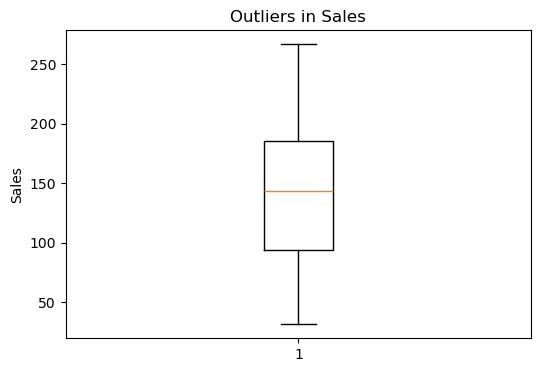

In [44]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Sales'])
plt.ylabel("Sales")
plt.title("Outliers in Sales")
plt.show()


<Axes: ylabel='count'>

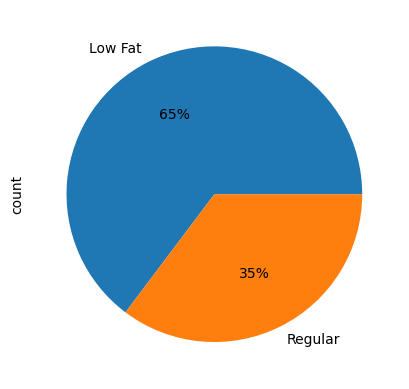

In [59]:
df["Item Fat Content"].value_counts().plot.pie(autopct="%.0f%%")


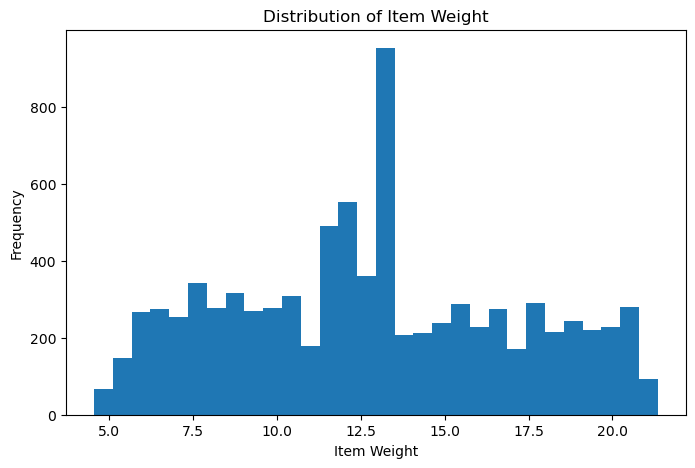

In [19]:
plt.figure(figsize=(8,5))      #uni-variante
plt.hist(df['Item Weight'], bins=30)
plt.xlabel("Item Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Item Weight")
plt.show()


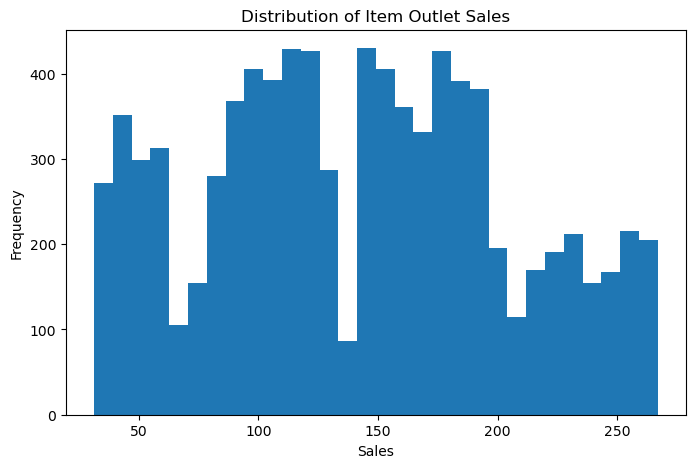

In [21]:
plt.figure(figsize=(8,5))
plt.hist(df['Sales'], bins=30)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Item Outlet Sales")
plt.show()


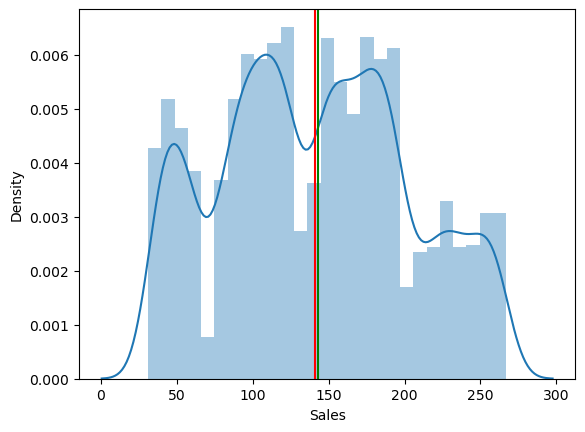

In [66]:
data=df["Sales"]
sns.distplot(data)
plt.axvline(data.mean(),color="red")
plt.axvline(np.median(data),color="green")
plt.show()

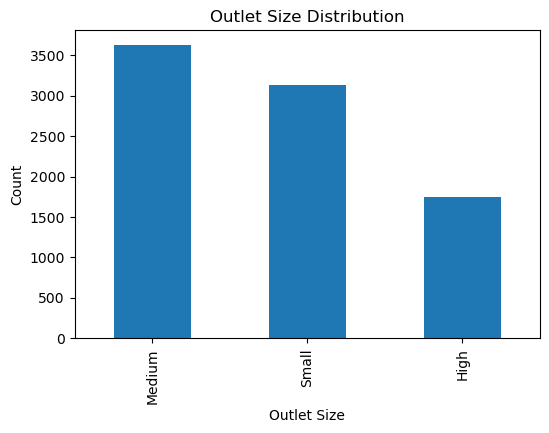

In [22]:
df['Outlet Size'].value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel("Outlet Size")
plt.ylabel("Count")
plt.title("Outlet Size Distribution")
plt.show()


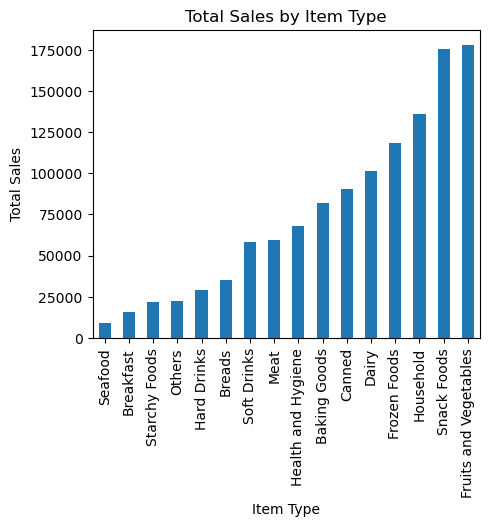

In [69]:
plt.figure(figsize=(5,4))    #Bi-variante
df.groupby("Item Type")["Sales"].sum().sort_values().plot(kind='bar')
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type")
plt.show()


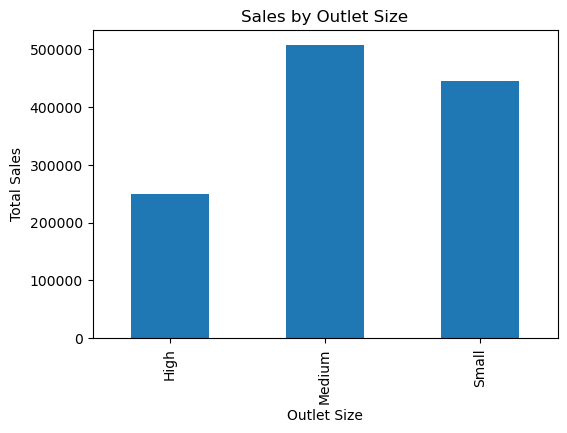

In [26]:
df.groupby("Outlet Size")["Sales"].sum().plot(kind='bar', figsize=(6,4))
plt.xlabel("Outlet Size")
plt.ylabel("Total Sales")
plt.title("Sales by Outlet Size")
plt.show()


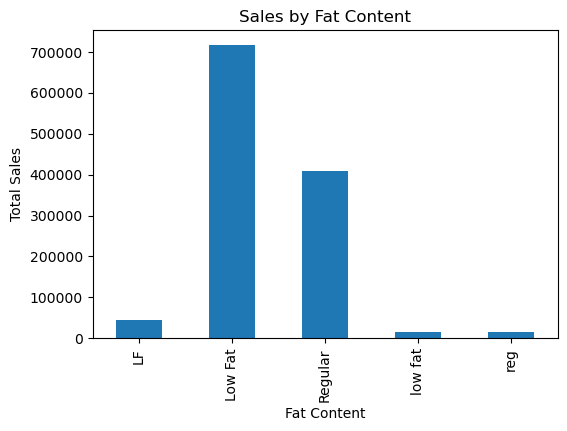

In [27]:
df.groupby("Item Fat Content")["Sales"].sum().plot(kind='bar', figsize=(6,4))
plt.xlabel("Fat Content")
plt.ylabel("Total Sales")
plt.title("Sales by Fat Content")
plt.show()


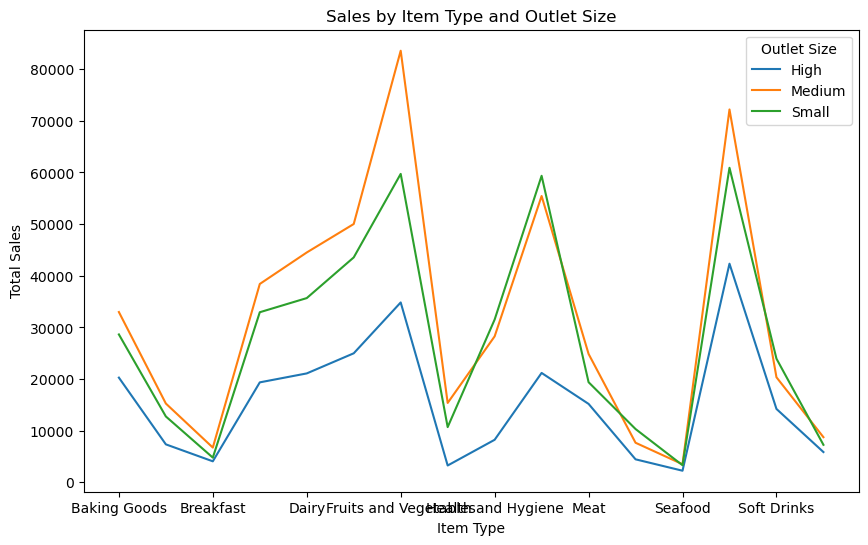

In [71]:
m= df.pivot_table(               #multi-variante #Line chart
    values="Sales",
    index="Item Type",
    columns="Outlet Size",
    aggfunc="sum"
)

m.plot(figsize=(10,6))
plt.title("Sales by Item Type and Outlet Size")
plt.ylabel("Total Sales")
plt.show()


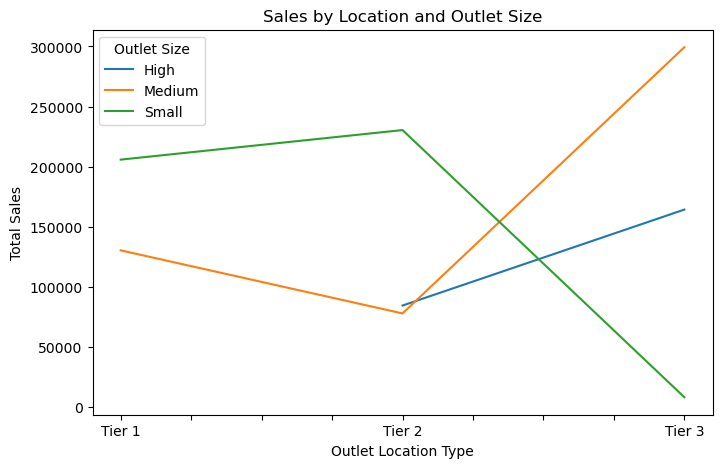

In [33]:
m2 = df.pivot_table(
    values="Sales",
    index="Outlet Location Type",
    columns="Outlet Size",
    aggfunc="sum"
)

m2.plot(figsize=(8,5))
plt.title("Sales by Location and Outlet Size")
plt.ylabel("Total Sales")
plt.show()


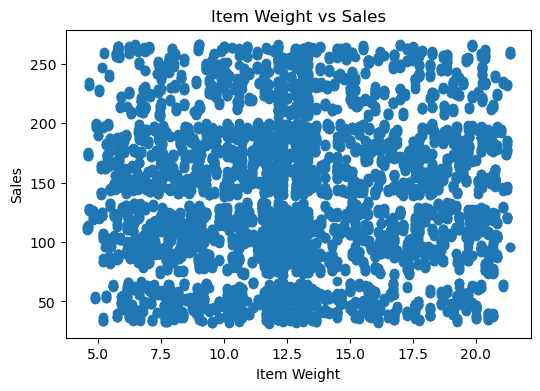

In [34]:
plt.figure(figsize=(6,4))    #Relationship between Weight & Sales
plt.scatter(df['Item Weight'], df['Sales'])
plt.xlabel("Item Weight")
plt.ylabel("Sales")
plt.title("Item Weight vs Sales")
plt.show()


In [35]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

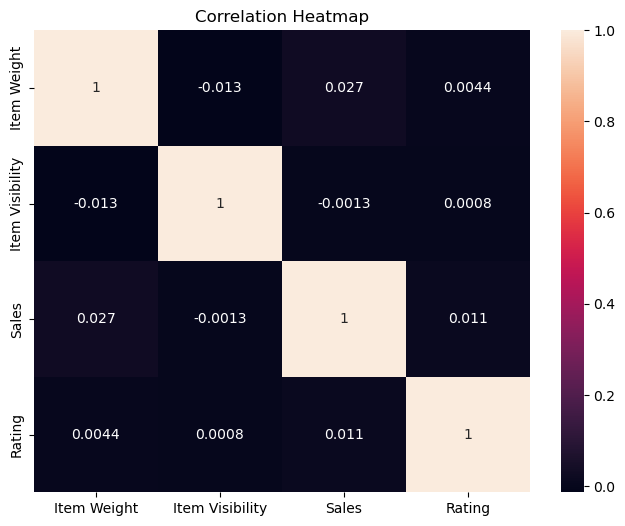

In [61]:
corr = df[['Item Weight','Item Visibility','Sales','Rating']].corr() #Correlation between numerical columns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()


<Figure size 200x200 with 0 Axes>

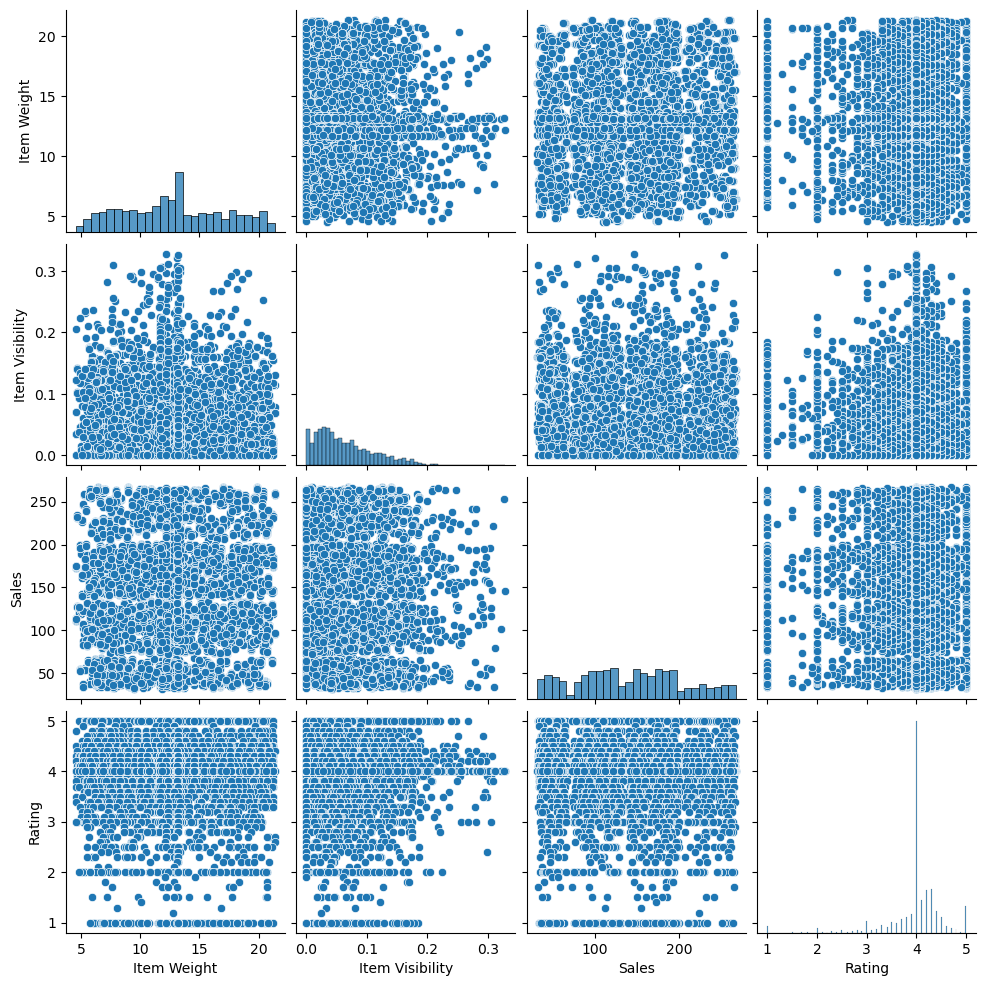

In [43]:
plt.figure(figsize=(2,2))
sns.pairplot(df[['Item Weight','Item Visibility','Sales','Rating']])
plt.show()


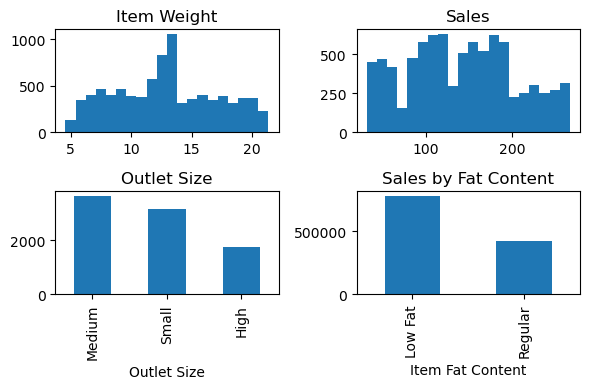

In [74]:
plt.figure(figsize=(6,4))   
plt.subplot(2,2,1)
plt.hist(df['Item Weight'], bins=20)
plt.title("Item Weight")
plt.subplot(2,2,2)
plt.hist(df['Sales'], bins=20)
plt.title("Sales")
plt.subplot(2,2,3)
df['Outlet Size'].value_counts().plot(kind='bar')
plt.title("Outlet Size")
plt.subplot(2,2,4)
df.groupby("Item Fat Content")["Sales"].sum().plot(kind='bar')
plt.title("Sales by Fat Content")
plt.tight_layout()
plt.show()
